# Feature Engineering

In [78]:
import pandas as pd
import numpy as np
%cd '/Users/Vincent/Desktop/Python/DataCamp/Data'
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Vincent/Desktop/Python/DataCamp/Data


In [46]:
# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv('Combined_DS_v10.csv')
print(so_survey_df.columns)

# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float'])
print(so_numeric_df.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby', 'Country',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary'],
      dtype='object')
Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


In [47]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')
print(one_hot_encoded.columns)

# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=["Country"], drop_first=True, prefix='DM')
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')
Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


In [48]:
import warnings
warnings.filterwarnings("ignore")
countries = so_survey_df.Country

# Get the counts of each category
country_counts = countries.value_counts()
print(country_counts)

mask = countries.isin(country_counts[country_counts < 10].index)
countries[mask] = 'Other'
print(pd.value_counts(countries))

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64
South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


In [49]:
# Binarizing numberic variables
so_survey_df = so_survey_df.dropna(axis=0, subset = ["ConvertedSalary"])

# paid if salary was received, regardless of amount
so_survey_df["Paid_Job"] = so_survey_df["ConvertedSalary"].apply(lambda val: 1 if val > 0 else 0)
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
1         1          70841.0
3         1          21426.0
4         1          41671.0
5         1         120000.0
7         1         250000.0


In [50]:
# Binning values

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]
# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the Salary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins,labels = labels)
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
1          Medium          70841.0
3             Low          21426.0
4             Low          41671.0
5            High         120000.0
7       Very high         250000.0


In [51]:
# Stray characters
# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(',', '')\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype('float')

print(so_survey_df['RawSalary'].head())

1     70841.0
3     21426.0
4     41671.0
5    120000.0
7    250000.0
Name: RawSalary, dtype: float64


# Scaling

In [84]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

so_numeric_df = so_survey_df.select_dtypes(include=['float64', 'int64'])

columns = ['Age','RawSalary','ConvertedSalary']
scalers = [MinMaxScaler(), StandardScaler(), PowerTransformer()]

for (column, scaler) in zip(columns,scalers):
    scaler.fit(np.array(so_numeric_df[column]).reshape(-1,1))
    so_numeric_df[column+'_scaled'] = scaler.transform(so_numeric_df[[column]])
    print(so_numeric_df[[column,column+'_scaled']].head())

   Age  Age_scaled
1   38    0.363636
3   46    0.509091
4   39    0.381818
5   39    0.381818
7   24    0.109091
   RawSalary  RawSalary_scaled
1    70841.0         -0.103955
3    21426.0         -0.340416
4    41671.0         -0.243539
5   120000.0          0.131281
7   250000.0          0.753359
   ConvertedSalary  ConvertedSalary_scaled
1          70841.0                0.312939
3          21426.0               -0.652182
4          41671.0               -0.135589
5         120000.0                0.793168
7         250000.0                1.524695


# Outliers

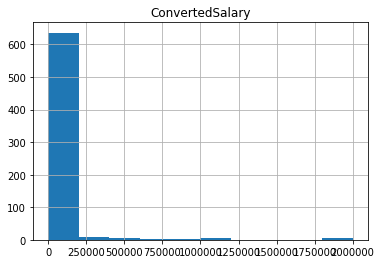

<Figure size 432x288 with 0 Axes>

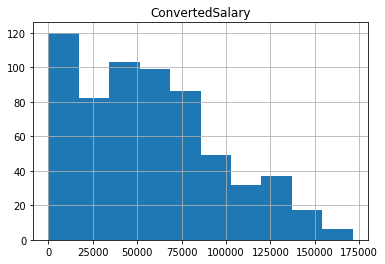

In [85]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

trimmed_df[['ConvertedSalary']].hist()
plt.show()

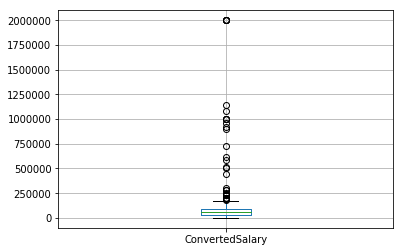

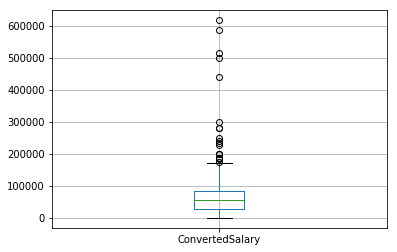

In [87]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                           & (so_numeric_df['ConvertedSalary'] > lower)]

so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

# Text

In [89]:
speech_df = pd.read_csv('inaugural_speeches.csv')

# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


In [91]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']].head())

                                          text_clean  char_cnt  word_cnt  \
0  fellow citizens of the senate and of the house...      8616      1432   
1  fellow citizens   i am again called upon by th...       787       135   
2  when it was first perceived  in early times  t...     13871      2323   
3  friends and fellow citizens   called upon to u...     10144      1736   
4  proceeding  fellow citizens  to that qualifica...     12902      2169   

   avg_word_length  
0         6.016760  
1         5.829630  
2         5.971158  
3         5.843318  
4         5.948363  


## Countvectorizer

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])
cv_transformed = cv.transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the shape of cv_array
print(cv_array.shape)

(58, 9043)


In [110]:
# limit number of features
cv = CountVectorizer(min_df=0.2,max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(58, 818)


In [111]:
cv_df = pd.DataFrame(cv_array, columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

                Name         Inaugural Address                      Date  \
0  George Washington   First Inaugural Address  Thursday, April 30, 1789   
1  George Washington  Second Inaugural Address     Monday, March 4, 1793   
2         John Adams         Inaugural Address   Saturday, March 4, 1797   
3   Thomas Jefferson   First Inaugural Address  Wednesday, March 4, 1801   
4   Thomas Jefferson  Second Inaugural Address     Monday, March 4, 1805   

                                                text  \
0  Fellow-Citizens of the Senate and of the House...   
1  Fellow Citizens:  I AM again called upon by th...   
2  WHEN it was first perceived, in early times, t...   
3  Friends and Fellow-Citizens:  CALLED upon to u...   
4  PROCEEDING, fellow-citizens, to that qualifica...   

                                          text_clean  char_cnt  word_cnt  \
0  fellow citizens of the senate and of the house...      8616      1432   
1  fellow citizens   i am again called upon by th...  

## Tfidf

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words="english")

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')

# Examine first row
sample_row = tv_df.iloc[0]
# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_citizens      0.229644
Name: 0, dtype: float64


In [118]:
# train test split as to 
train_speech_df= speech_df.iloc[0:45,:]
test_speech_df = speech_df.iloc[45:-1,:]

tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit and transform the train data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# only transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(test_tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.000000              0.029540       0.233954        0.082703   
1      0.000000              0.000000       0.547457        0.036862   
2      0.000000              0.000000       0.126987        0.134669   
3      0.037094              0.067428       0.267012        0.031463   
4      0.000000              0.000000       0.221561        0.156644   

   TFIDF_authority  TFIDF_best  TFIDF_business  TFIDF_citizens  \
0         0.000000    0.000000        0.000000        0.022577   
1         0.000000    0.036036        0.000000        0.015094   
2         0.000000    0.131652        0.000000        0.000000   
3         0.039990    0.061516        0.050085        0.077301   
4         0.028442    0.087505        0.000000        0.109959   

   TFIDF_commerce  TFIDF_common     ...       TFIDF_subject  TFIDF_support  \
0             0.0      0.000000     ...                 0.0       0.000000   
1             

# N-grams

In [121]:
# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Create a DataFrame 
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_constitution united states    20
Counts_people united states          13
Counts_preserve protect defend       10
Counts_mr chief justice              10
Counts_president united states        8
dtype: int64
